<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Python/callputoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build your option strategy (up to 8 legs):

Leg 1 (press Enter to finish):
Option type (call/put): call
Position (long/short): long
Strike price: 100
Premium paid/received: 20

Leg 2 (press Enter to finish):
Option type (call/put): 


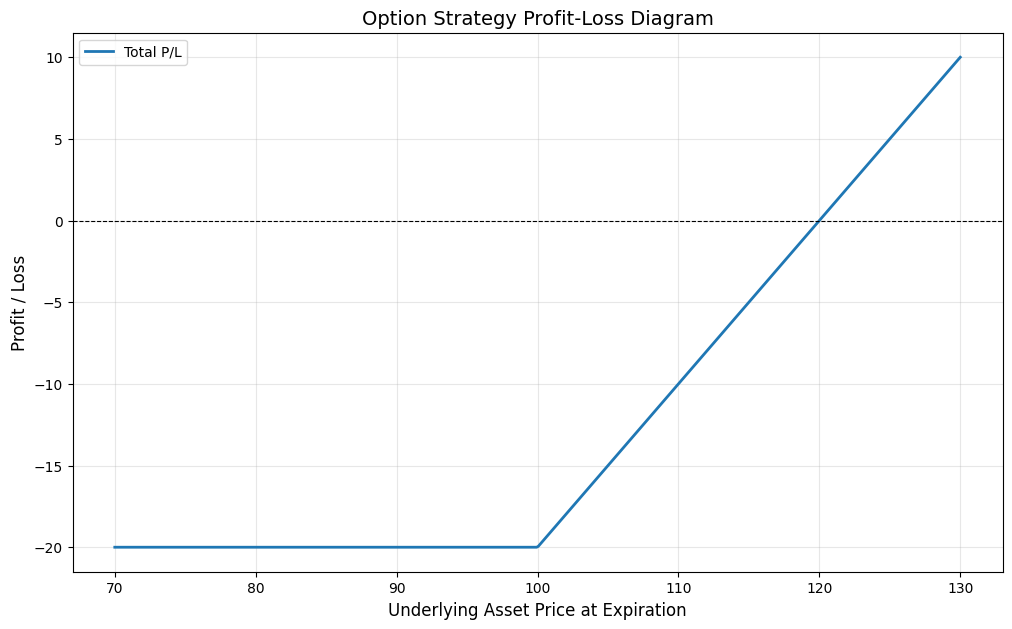

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_option_legs():
    """Collects option strategy details from the user"""
    print("Build your option strategy (up to 8 legs):")
    legs = []
    for i in range(8):
        print(f"\nLeg {i+1} (press Enter to finish):")
        option_type = input("Option type (call/put): ").strip().lower()
        if not option_type:
            break
        position = input("Position (long/short): ").strip().lower()
        strike = float(input("Strike price: "))
        premium = float(input("Premium paid/received: "))

        legs.append({
            'type': option_type,
            'position': position,
            'strike': strike,
            'premium': premium
        })
    return legs

def calculate_pl(legs, prices):
    """Calculates total profit/loss for given underlying prices"""
    total_pl = np.zeros_like(prices)

    for leg in legs:
        direction = 1 if leg['position'] == 'long' else -1
        strike = leg['strike']
        premium = leg['premium']

        if leg['type'] == 'call':
            payoff = np.maximum(prices - strike, 0)
        else:  # put
            payoff = np.maximum(strike - prices, 0)

        # Calculate leg P/L: (direction * payoff) + premium adjustment
        leg_pl = (direction * payoff) + (-premium if direction == 1 else premium)
        total_pl += leg_pl

    return total_pl

def plot_strategy(legs):
    """Generates and displays the P/L diagram"""
    if not legs:
        print("No legs entered!")
        return

    # Create price range based on strike prices
    strikes = [leg['strike'] for leg in legs]
    min_price = min(strikes) * 0.7
    max_price = max(strikes) * 1.3
    prices = np.linspace(min_price, max_price, 500)

    total_pl = calculate_pl(legs, prices)

    # Plot configuration
    plt.figure(figsize=(12, 7))
    plt.plot(prices, total_pl, label='Total P/L', linewidth=2)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title("Option Strategy Profit-Loss Diagram", fontsize=14)
    plt.xlabel("Underlying Asset Price at Expiration", fontsize=12)
    plt.ylabel("Profit / Loss", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    legs = get_option_legs()
    plot_strategy(legs)
